In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from tqdm import tqdm

In [2]:
from mcmc import *
from constants import *

# Initialisation

In [3]:
K = len(z)
theta_0 = np.ones(shape = [K]) * np.mean(z)

# Question 1

For this question we use the "gibbs_sampler" function from mcmc.py

## Classical Markov Chain without coupling

In [4]:
N = 1_000

mcmc_chain = [(1, 1, theta_0)]
for i in range(N):
    mcmc_chain.append(gibbs_sampler(mcmc_chain[-1][2]))

We retrieve each component

In [5]:
k = 3
m = 30
R = 1000
gibbs_estim_theta = []
gibbs_estim_A = []
gibbs_estim_mu = []

for e in mcmc_chain:
  gibbs_estim_theta.append(e[2][0])
  gibbs_estim_A.append(float(e[0]))
  gibbs_estim_mu.append(float(e[1]))

## Display the results

Text(0.5, 1.0, 'A')

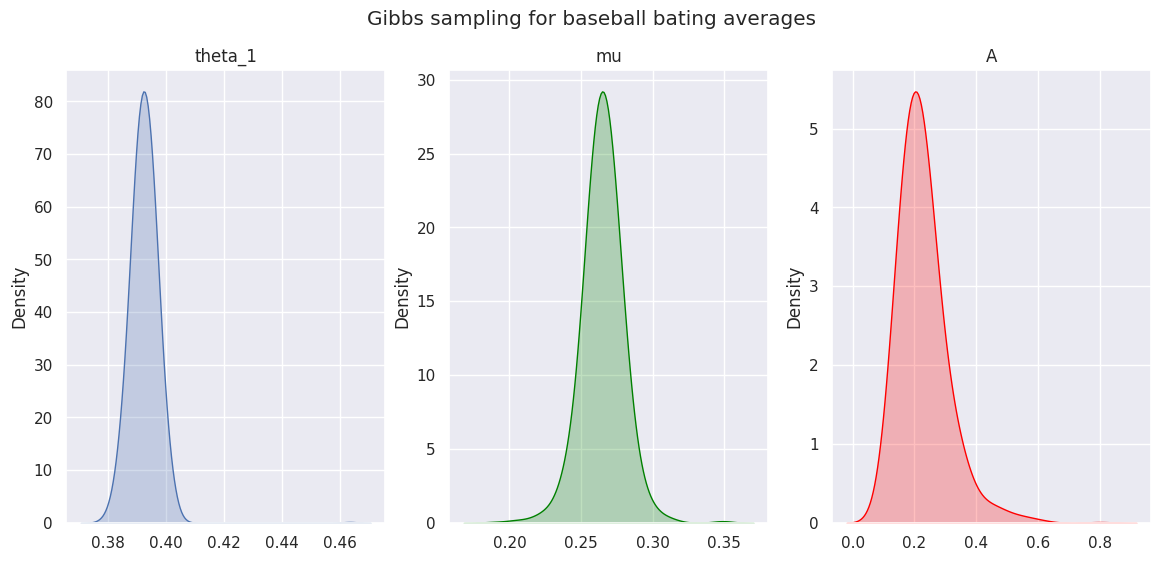

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6), dpi=100)

sns.set(style="darkgrid")

sns.kdeplot(
  gibbs_estim_theta, bw_method = 0.5 , fill = True,
  label="theta_1", ax=axs[0], x = "theta_1"
)
sns.kdeplot(
  gibbs_estim_mu, bw_method = 0.5 , fill = True,
  label="mu", ax=axs[1], color = "Green", x = "mu"
)
sns.kdeplot(
  gibbs_estim_A, bw_method = 0.5 , fill = True,
  label="A", ax = axs[2], color = "Red", x = "A"
)

fig.suptitle(
    "Gibbs sampling for baseball bating averages"
)

axs[0].set_title('theta_1')
axs[1].set_title('mu')
axs[2].set_title('A')

We have similar results than the article

# Question 2

We first implement the general "maximal_coupling" function

In [7]:
def maximal_coupling_gamma(sampler_p, p, sampler_q, q):
    """
    sampler_p: function that sample from the law that has distribution p
    p: first distribution, val p : float -> float
    sampler_q: function that sample from the law that has distribution q
    q: second distribution, val p : float -> float
    """
    X = sampler_p()
    W = np.random.uniform(low = 0., high = p(X))


    if W <= q(X):
        return X,X
    Y_star = sampler_q()
    W_star = np.random.uniform(low = 0., high = q(Y_star))
    while W_star <= p(Y_star):
        Y_star = sampler_q()
        W_star = np.random.uniform(low = 0., high = q(Y_star))
    return X, Y_star

        

## Coupling two inverse gamma law

In [8]:
def coupled_invgamma(a_1, b_1, a_2, b_2):
    
    pdf_p = partial(stats.invgamma.pdf, a=a_1, loc=0, scale = b_1)
    sampler_p = partial(stats.invgamma.rvs, a=a_1, loc=0, scale = b_1, size=1)

    pdf_q = partial(stats.invgamma.pdf, a=a_2, loc=0, scale =b_2)
    sampler_q = partial(stats.invgamma.rvs, a=a_2, loc=0, scale =b_2, size=1)
    return maximal_coupling_gamma(sampler_p = sampler_p, p = pdf_p, sampler_q = sampler_q, q = pdf_q)


In [9]:
coupled_invgamma(3, 1, 3, 1)

(array([0.24655968]), array([0.24655968]))

In [10]:
l = []
for _ in range(500):
    t = coupled_invgamma(3, 1, 4, 2)
    if t[0] == t[1]:
        print('coupled')
    else:
        print('nc')
    l.append(float(t[0]))

coupled
nc
nc
coupled
coupled
coupled
coupled
nc
nc
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
nc
coupled
nc
nc
nc
coupled
nc
coupled
coupled
nc
coupled
nc
nc
nc
coupled
coupled
coupled
coupled
nc
coupled
coupled
nc
nc
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
nc
coupled
nc
nc
nc
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
nc
nc
coupled
nc
coupled
coupled
nc
nc
coupled
coupled
coupled
coupled
coupled
coupled
nc
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
coupled
nc
coupled
nc
coupled
nc
coupled
coupled
coupled
c

<AxesSubplot:ylabel='Density'>

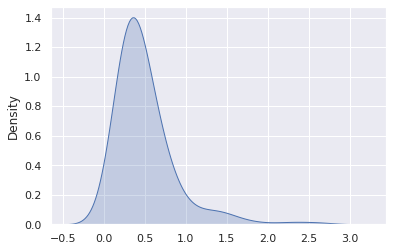

In [11]:
sns.kdeplot(
  l, bw_method = 0.5 , fill = True,
  label="theta_1", x = "theta_1"
)

## Displaying gamma pdf

In [12]:
stats.invgamma.pdf(5, a = 2, loc = 45, scale = 4)

0.0

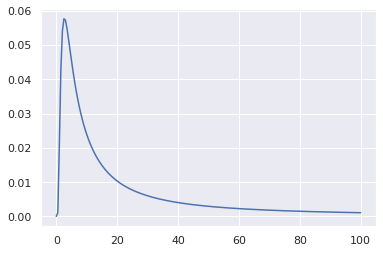

In [13]:
x = np.linspace(0, 100, num = 200)
plt.plot(x, stats.invgamma.pdf(x, a = .5, loc = 0, scale = 4))

# Coupling two Gaussian law

In [14]:
def coupled_gaussian(a_1, b_1, a_2, b_2):
    
    pdf_p = partial(stats.norm.pdf, loc=a_1, scale = b_1)
    sampler_p = partial(stats.norm.rvs, loc=a_1, scale = b_1, size=1)

    pdf_q = partial(stats.norm.pdf, loc=a_2, scale =b_2)
    sampler_q = partial(stats.norm.rvs, loc=a_2, scale =b_2, size=1)
    return maximal_coupling_gamma(sampler_p = sampler_p, p = pdf_p, sampler_q = sampler_q, q = pdf_q)

In [15]:
coupled_gaussian(3, 1, 6, 7)

(array([2.7128263]), array([8.13271214]))

In [ ]:
l_n = []
for _ in range(500):
    t = coupled_gaussian(3, 1, 4, 2)
    if t[0] == t[1]:
        print('coupled')
    else:
        print('nc')
    l_n.append(float(t[0]))

<AxesSubplot:ylabel='Density'>

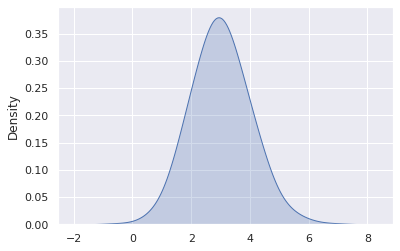

In [17]:
sns.kdeplot(
  l_n, bw_method = 0.5 , fill = True,
  label="theta_1", x = "theta_1"
)

# Question 3

We define another gibbs_sampler, that couples the rv 

In [18]:

# ********************* gibbs sampler *****************

def sum_over_theta(theta: NDArray[np.float32]):
    K = theta.shape[0]
    sum_of_squares = np.sum(theta ** 2)
    sum_elements = np.sum(theta)
    return  (sum_of_squares - sum_elements**2 / K) / 2. , sum_elements / K




def coupled_gibbs_sampler(x_t: NDArray[np.float32], y_t_1: NDArray[np.float32]):
    theta_x = x_t[2:]
    theta_y = y_t_1[2:]
    
    K = theta_x.shape[0]
    sum_gamma_x, mean_mu_x = sum_over_theta(theta_x)
    sum_gamma_y, mean_mu_y = sum_over_theta(theta_y)

    # simulation of A
    A_x, A_y = coupled_invgamma(a + K / 2., b + sum_gamma_x, a + K / 2., b + sum_gamma_y)

    # simulation of mu
    mu_x, mu_y = coupled_gaussian(mean_mu_x, A_x / K, mean_mu_y, A_y / K)


    # computation of the constants
    inv_v_plus_a_x = 1. / (V + A_x)
    inv_v_plus_a_y = 1. / (V + A_y)

    # simulation of theta 
    new_theta_x = np.zeros(shape = [K])
    new_theta_y = np.zeros(shape = [K])
    for i in range(K):
        new_theta_x[i], new_theta_y[i] = coupled_gaussian(inv_v_plus_a_x * (mu_x * V + z[i] * A_x), inv_v_plus_a_x * A_x * V, inv_v_plus_a_y * (mu_y * V + z[i] * A_y), inv_v_plus_a_y * A_y * V)

    # updating result
    x_t_plus_1 = np.zeros(shape = [K+2])
    y_t = np.zeros(shape = [K+2])

    x_t_plus_1[0] = A_x
    y_t[0] = A_y

    x_t_plus_1[1] = mu_x
    y_t[1] = mu_y

    x_t_plus_1[2:] = new_theta_x
    y_t[2:] = new_theta_y

    return x_t_plus_1, y_t

In [19]:

def unbiased_mcmc_coupled_gibbs_sampler_l(burnin: int, m: int, theta_0: NDArray[np.float32], h):
    """
    burnin is 'k' in the paper
    this function returns the mean H_k:m (X,Y), where X is (A, mu, theta_i)
    """
    
    #ini
    A_x, mu_x, theta_1_x = gibbs_sampler(theta = theta_0)
    A_y, mu_y, theta_1_y = gibbs_sampler(theta = theta_0)
    x = np.concatenate([A_x, mu_x, theta_1_x])
    y = np.concatenate([A_y, mu_y, theta_1_y])

    # lists
    x_y = [(x, y)]

    H = []
    tau = 1

    while tau < m or (x_y[-1][0] != x_y[-1][1]).any():

        x_y.append(coupled_gibbs_sampler(*x_y[-1]))
        tau += 1


    for l in range(burnin, m):
        H.append(h(x_y[l][0]) + np.sum([h(x) - h(y) for x, y in x_y[l+1:tau]]))


    return H

In [41]:

def unbiased_mcmc_coupled_gibbs_sampler(burnin: int, m: int, theta_0: NDArray[np.float32], h):
    """
    burnin is 'k' in the paper
    this function returns the mean H_k:m (X,Y), where X is (A, mu, theta_i)
    """
    
    #ini
    A_x, mu_x, theta_1_x = gibbs_sampler(theta = theta_0)
    A_y, mu_y, theta_1_y = gibbs_sampler(theta = theta_0)
    x = np.concatenate([A_x, mu_x, theta_1_x])
    y = np.concatenate([A_y, mu_y, theta_1_y])

    # lists
    x_y = [(x, y)]
    tau = 1

    while tau < m and (x_y[-1][0] != x_y[-1][1]).any():
        x_y.append(coupled_gibbs_sampler(*x_y[-1]))
        tau += 1

    H = np.array([h(x_y[burnin][0]) + np.sum([h(x) - h(y) for x, y in x_y[burnin+1:tau]])])

    for l in range(burnin + 1, np.minimum(m, tau)):
        H = np.append(H,[h(x_y[l][0]) + np.sum([h(x) - h(y) for x, y in x_y[l+1:tau]])],axis= 0)

    return H.mean(axis = 0)

In [42]:
tau = 3
m = 5
np.minimum(m, tau)

3

creating h functions...

In [43]:
h_A = lambda x: x[0]
h_mu = lambda x: x[1]
h_theta = lambda x: x[2:]
id_ = lambda x: x

setting up k and m

In [44]:
k = 5; m = 10 * k
N = 500

In [45]:
res = unbiased_mcmc_coupled_gibbs_sampler(burnin = 1, m = m, theta_0 = theta_0, h = id_)

In [46]:
res

array([0.27069748, 0.26743488, 0.39412467, 0.37490094, 0.35953511,
       0.3355993 , 0.31302869, 0.31364084, 0.2961641 , 0.25937254,
       0.2461492 , 0.24429242, 0.22358162, 0.22515373, 0.22286496,
       0.22509835, 0.22849001, 0.1988184 , 0.17596807, 0.14474616])

In [56]:
unbiased_mcmc = [res]

for _ in tqdm(range(1000)): 
    unbiased_mcmc = np.append(unbiased_mcmc, [unbiased_mcmc_coupled_gibbs_sampler(burnin = 1, m = m, theta_0 = theta_0, h = id_)], axis= 0)



100%|██████████| 1000/1000 [00:06<00:00, 150.81it/s]


In [57]:
unbiased_mcmc.shape

(1001, 20)

In [58]:
gibbs_estim_A = unbiased_mcmc[:,0]
gibbs_estim_mu = unbiased_mcmc[:,1]
gibbs_estim_theta = unbiased_mcmc[:,2]

# Display

Text(0.5, 1.0, 'A')

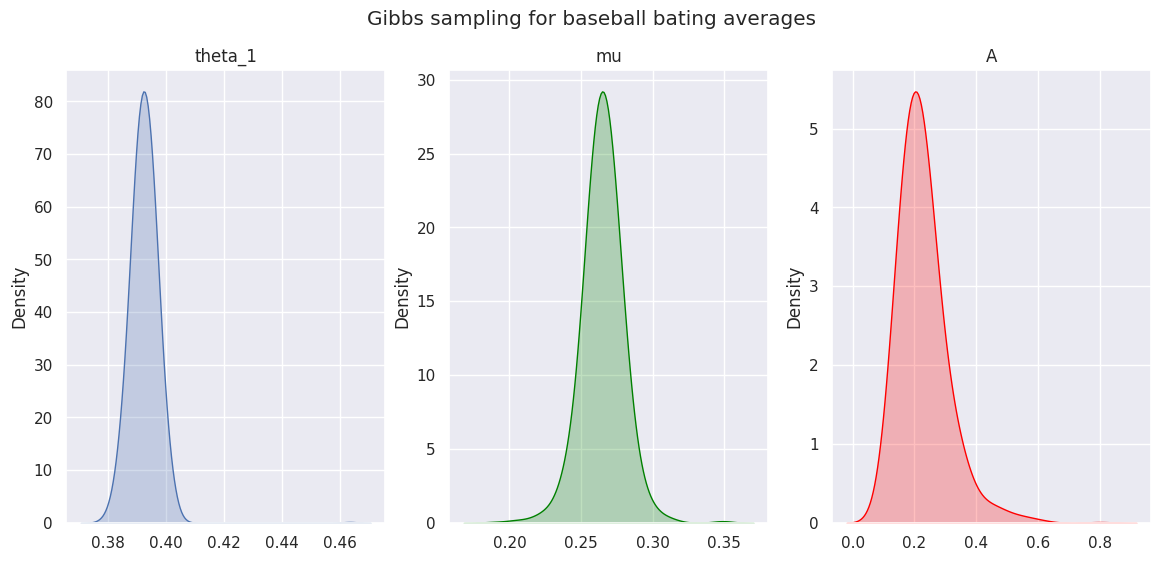

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6), dpi=100)

sns.set(style="darkgrid")

sns.kdeplot(
  gibbs_estim_theta, bw_method = 0.5 , fill = True,
  label="theta_1", ax=axs[0], x = "theta_1"
)
sns.kdeplot(
  gibbs_estim_mu, bw_method = 0.5 , fill = True,
  label="mu", ax=axs[1], color = "Green", x = "mu"
)
sns.kdeplot(
  gibbs_estim_A, bw_method = 0.5 , fill = True,
  label="A", ax = axs[2], color = "Red", x = "A"
)

fig.suptitle(
    "Gibbs sampling for baseball bating averages"
)

axs[0].set_title('theta_1')
axs[1].set_title('mu')
axs[2].set_title('A')

# Random Walk Metropolis

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from constants import *

In [14]:
pi = stats.multivariate_normal()
sigma = 0.3

K = len(z)
N = K + 2

In [12]:
x = pi.rvs(size = 100)

(array([ 3.,  7., 12., 23., 15., 17., 11., 10.,  1.,  1.]),
 array([-2.30039176, -1.74738754, -1.19438331, -0.64137908, -0.08837486,
         0.46462937,  1.0176336 ,  1.57063783,  2.12364205,  2.67664628,
         3.22965051]),
 <BarContainer object of 10 artists>)

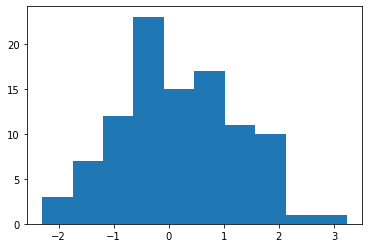

In [13]:
plt.hist(x)

In [ ]:
def metropolis_hasting(x):
    """
    x = (A, mu, theta_i)
    """
    y = x + sigma * np.random.multivariate_normal()

In [ ]:
np.random.multivariate_normal()